In [1]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df['Age Range'].value_counts()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [2]:
df['Age Range'].value_counts(normalize=True) #ca.21,5% der Kunden sind zwischen 25-34 Jahre alt. 

25 to 34 years       0.215208
35 to 44 years       0.159227
10 to 19 years       0.139271
45 to 54 years       0.124026
0 to 9 years         0.090357
65 to 74 years       0.071216
20 to 24 years       0.070318
55 to 59 years       0.050161
60 to 64 years       0.046783
75 years and over    0.033433
Name: Age Range, dtype: float64

In [3]:
age_mode = df['Age Range'].mode()
age_mode[0]

'25 to 34 years'

In [4]:
df['Year Patron Registered'].value_counts(normalize=True) #Im Jahr 2013 wurden ca. 11,4% der Kunden registriert. In den kommenden Jahren wurden stetig weniger Kunden registriert.

2003    0.163555
2015    0.127409
2014    0.122570
2013    0.113948
2012    0.088311
2011    0.062655
2016    0.062081
2010    0.057436
2009    0.052679
2008    0.048455
2007    0.031383
2006    0.025448
2005    0.022832
2004    0.021240
Name: Year Patron Registered, dtype: float64

In [5]:
age_range_mode = df['Age Range'].mode()[0]
df['Age Range'].fillna(age_range_mode, inplace=True)

In [6]:
df['Age Range'].isna().sum()

0

In [7]:
df['Age Range'].value_counts(normalize=True)

25 to 34 years       0.215606
35 to 44 years       0.159146
10 to 19 years       0.139200
45 to 54 years       0.123963
0 to 9 years         0.090311
65 to 74 years       0.071180
20 to 24 years       0.070283
55 to 59 years       0.050136
60 to 64 years       0.046759
75 years and over    0.033416
Name: Age Range, dtype: float64

In [8]:
df['Total Checkouts'].mean() #Mittelwert

161.98209697530748

In [9]:
df['Total Checkouts'].median() #Median

19.0

In [10]:
df['Total Checkouts'].quantile(q=[0.25, 0.5, 0.75])

0.25      2.0
0.50     19.0
0.75    113.0
Name: Total Checkouts, dtype: float64

In [11]:
# identifies 0.5% of the data at both ends of the distribution
alpha = 0.005
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.005       0.00
0.995    2827.53
Name: Total Checkouts, dtype: float64

In [12]:
df['Total Checkouts'].var()

205847.027758416

In [13]:
df['Total Checkouts'].std()

453.7036783611259

In [14]:
df['Total Renewals'].var()

50629.46272559851

In [15]:
#Aufgabe 3.4

df['Total Checkouts'].std()/df['Total Checkouts'].mean()

2.8009495298130904

In [16]:
df['Total Renewals'].std()/df['Total Renewals'].mean()

3.7717062851167245

In [17]:
#Spannweite:

df['Total Checkouts'].max() - df['Total Checkouts'].min()

35907

In [18]:
#Interquartilsabstand

df['Total Checkouts'].quantile(q=0.75) - df['Total Checkouts'].quantile(q=0.25)

111.0

/home/anna/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Checkouts'>

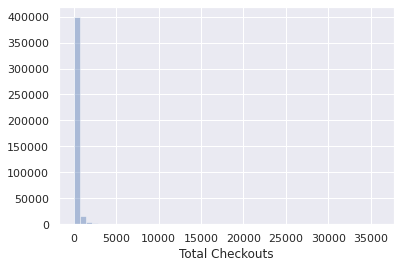

In [19]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv("../data/Library_Usage.csv")
sns.distplot(df['Total Checkouts'], kde=False)

In [20]:
#Kreutabellen:

import pandas as pd

df = pd.read_csv(
    "../data/Library_Usage.csv", 
    na_values="none"
)
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True
)

Notice Preference Definition,email,phone,print,All
Provided Email Address,,,,
False,95,58362,28569,87026
True,323842,9810,2767,336419
All,323937,68172,31336,423445


In [21]:
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True, normalize=1
)


Notice Preference Definition,email,phone,print,All
Provided Email Address,,,,
False,0.000293,0.856099,0.911699,0.205519
True,0.999707,0.143901,0.088301,0.794481


In [22]:
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True, normalize=0
)


Notice Preference Definition,email,phone,print
Provided Email Address,,,
False,0.001092,0.670627,0.328281
True,0.962615,0.029160,0.008225
All,0.765004,0.160994,0.074003


In [25]:
pd.crosstab(
    df['Age Range'],
    df['Total Checkouts'],
    margins=True
)


Total Checkouts,0,1,2,3,4,5,6,7,8,9,...,15505,15598,16060,17308,18064,18397,24093,25223,35907,All
Age Range,,,,,,,,,,,,,,,,,,,,,
0 to 9 years,4509,1140,1005,960,940,836,777,611,612,572,...,0,0,0,0,0,0,0,0,0,38242
10 to 19 years,7398,1772,1464,1243,1120,1012,854,829,742,667,...,0,0,0,0,0,0,0,0,0,58944
20 to 24 years,6251,3155,1751,1309,1046,769,667,565,526,452,...,0,0,0,0,0,0,0,0,0,29761
25 to 34 years,20218,8133,5277,4108,3250,2847,2422,2154,1891,1607,...,0,0,0,0,0,0,0,0,0,91083
35 to 44 years,11991,3371,2401,2055,1736,1541,1331,1199,1055,1039,...,0,0,0,0,0,0,0,0,1,67390
45 to 54 years,8591,2379,1572,1326,1042,964,816,737,716,595,...,0,0,0,0,0,0,1,0,0,52492
55 to 59 years,3755,983,627,551,426,353,312,284,271,247,...,0,1,0,0,0,0,0,0,0,21230
60 to 64 years,3530,787,602,472,372,319,297,221,241,213,...,1,0,0,1,1,0,0,0,0,19800
65 to 74 years,5389,1185,862,624,514,460,412,361,314,298,...,0,0,1,0,0,1,0,1,0,30141


In [26]:
#Korrelationen:

df = pd.read_csv("../data/Library_Usage.csv")
df['Total Checkouts'].corr(df['Total Renewals'])

0.5893620279316908

In [27]:

df['Total Checkouts'].corr(df['Year Patron Registered'])

-0.360100270320219

In [29]:
#Seaborn:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

# use sample to generate a random subsample
df = pd.read_csv("../data/Library_Usage.csv").sample(n=1000)

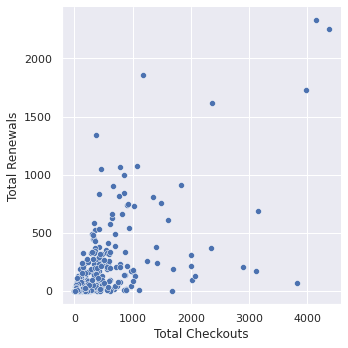

In [30]:
sns.relplot(x='Total Checkouts', y='Total Renewals', data=df)

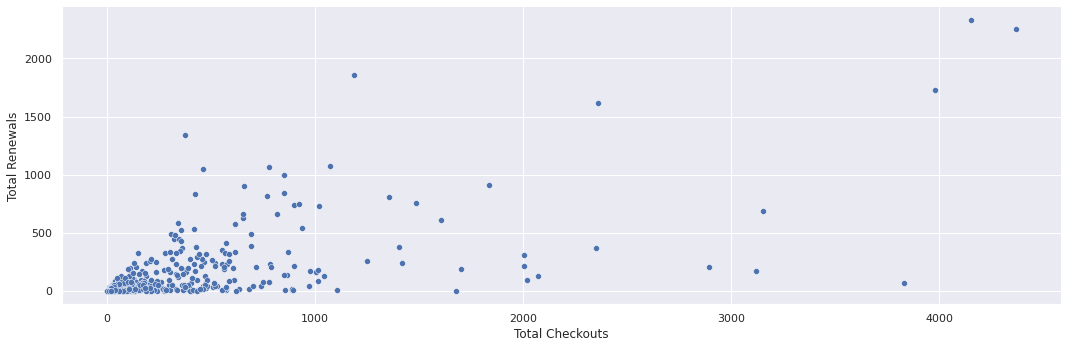

In [32]:
#Plotgröße

sns.relplot(x='Total Checkouts', y='Total Renewals', data=df, height=5, aspect=3)

In [33]:
#Speichern:

plt.savefig('../tutorial.png', dpi=150)

<Figure size 432x288 with 0 Axes>

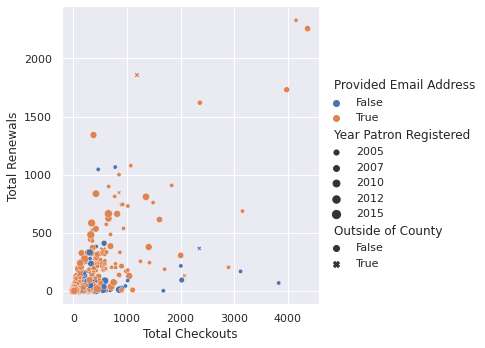

In [34]:
#Weitere Eigenschaften:

sns.relplot(x='Total Checkouts', y='Total Renewals', 
                hue='Provided Email Address', style='Outside of County', 
                size='Year Patron Registered', data=df)

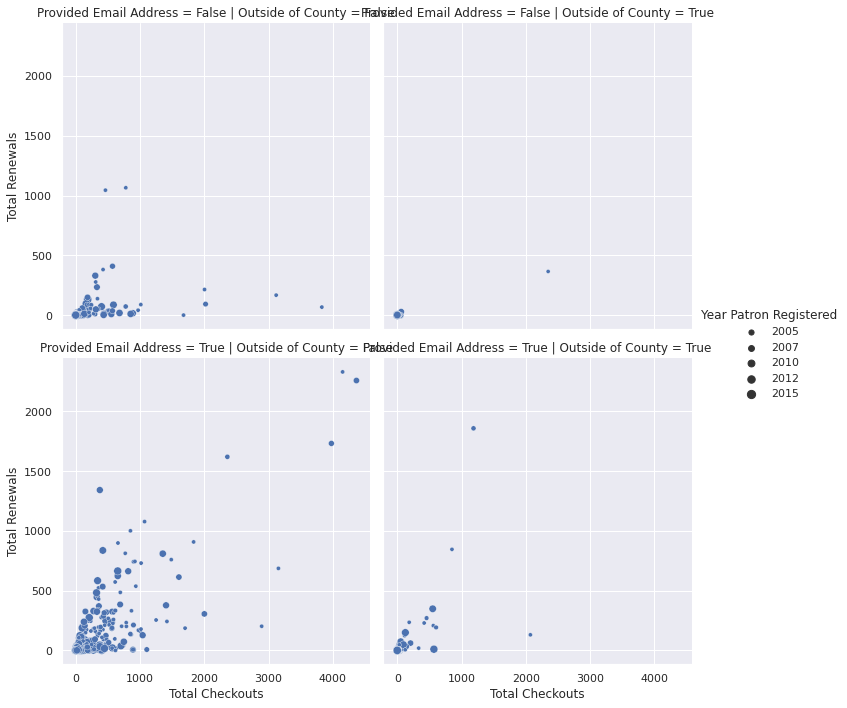

In [35]:
#Plot-Gitter:

sns.relplot(x='Total Checkouts', y='Total Renewals', 
            size='Year Patron Registered',
            row='Provided Email Address', col='Outside of County', data=df)

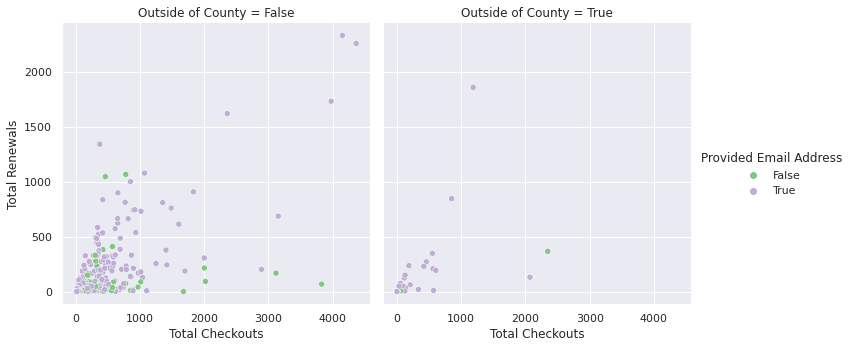

In [36]:
#Farbpalette:

sns.relplot(x='Total Checkouts', y='Total Renewals', 
            hue='Provided Email Address', 
            col='Outside of County',
            palette=sns.color_palette('Accent', 2), 
            data=df)

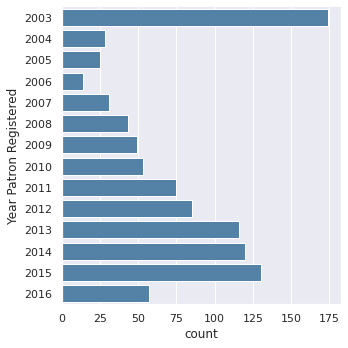

In [37]:
#Nominale und ordinale Variablen:

sns.catplot(y='Year Patron Registered',
            data=df, kind='count', color="steelblue")

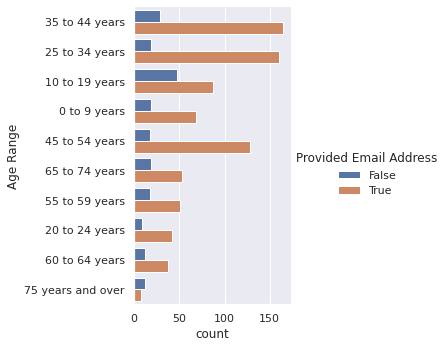

In [38]:
sns.catplot(y='Age Range', hue='Provided Email Address', 
            data=df, kind='count')

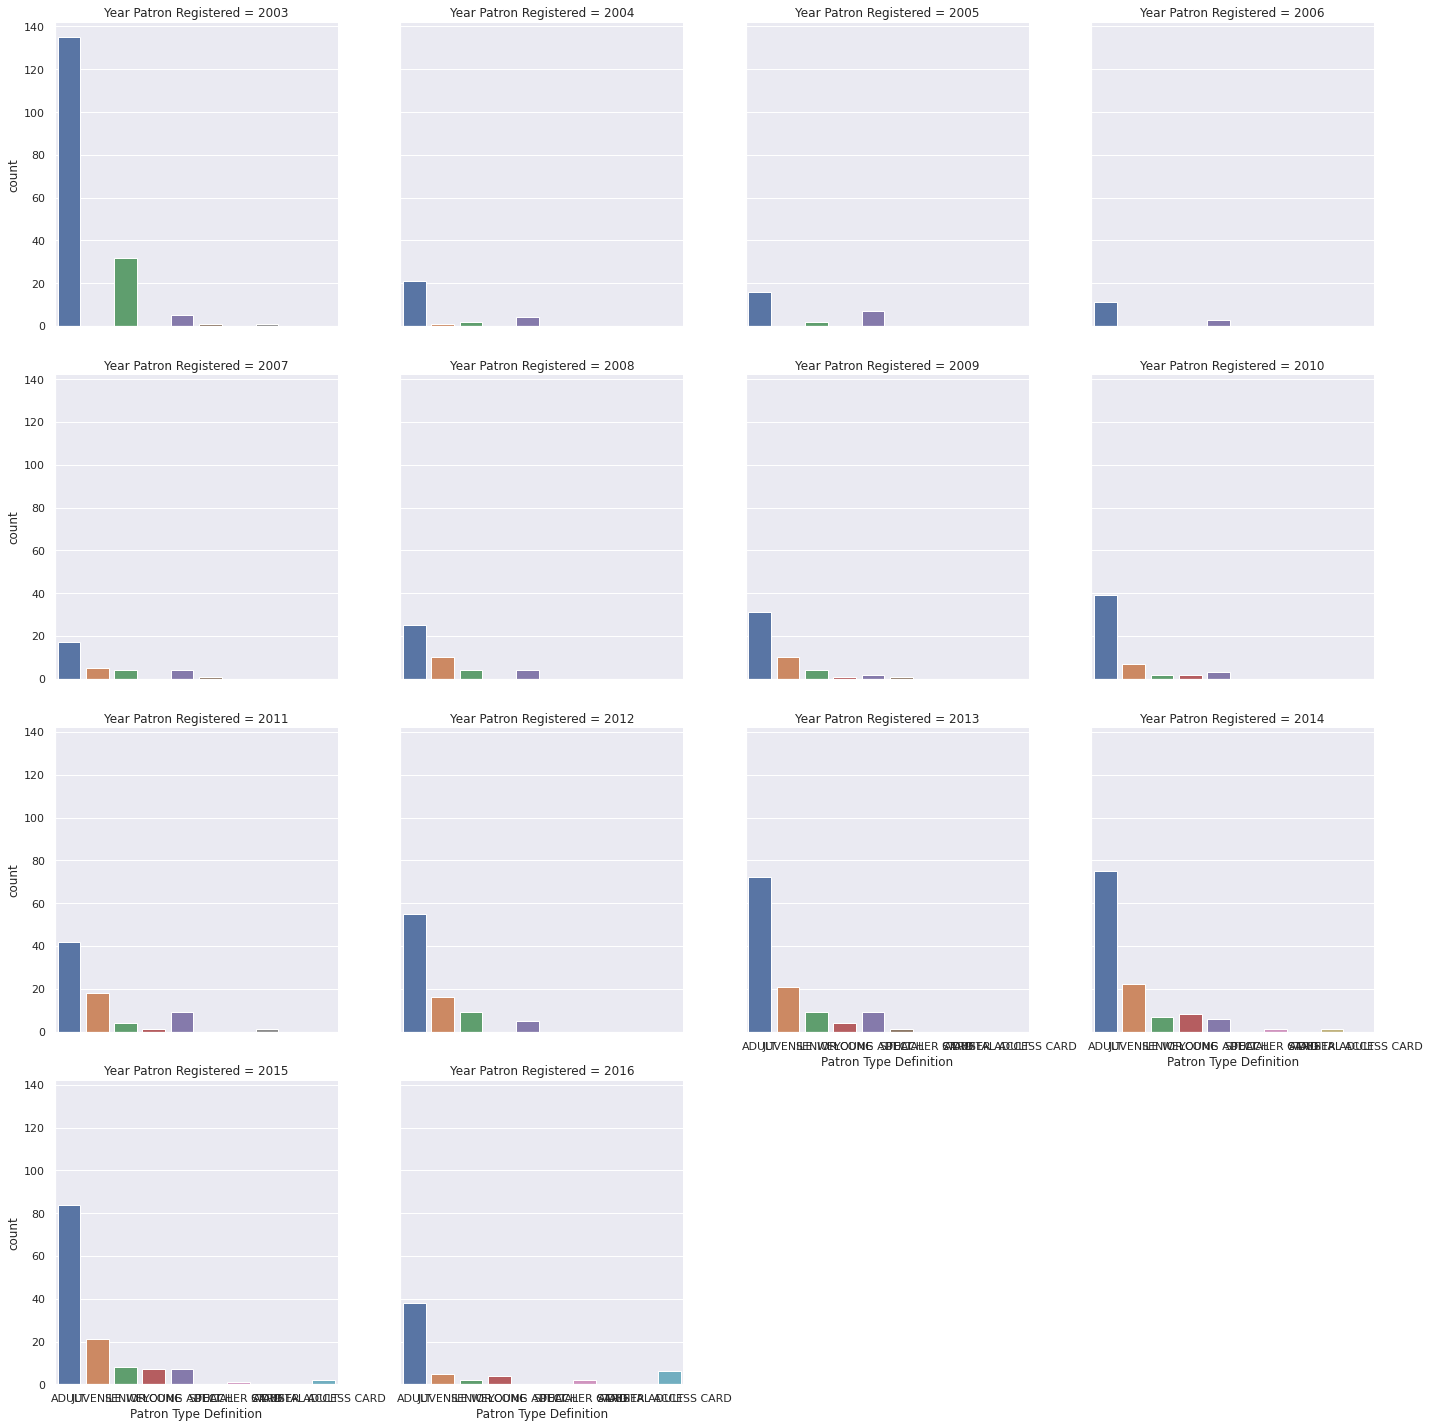

In [39]:
sns.catplot(x='Patron Type Definition', 
            data=df, kind='count', 
            col='Year Patron Registered', col_wrap=4)


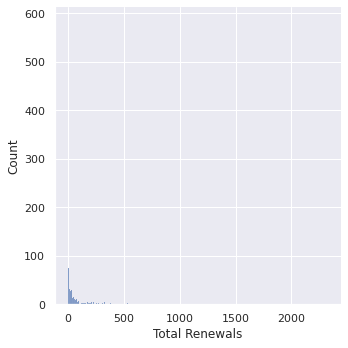

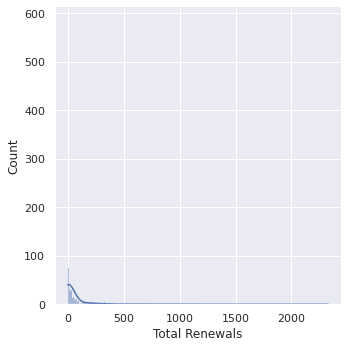

In [41]:
#Metrische Variablen:

# Histogram

sns.displot(df['Total Renewals'], kde=False)

# With density estimation

sns.displot(df['Total Renewals'], kde=True)

/home/anna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: Use

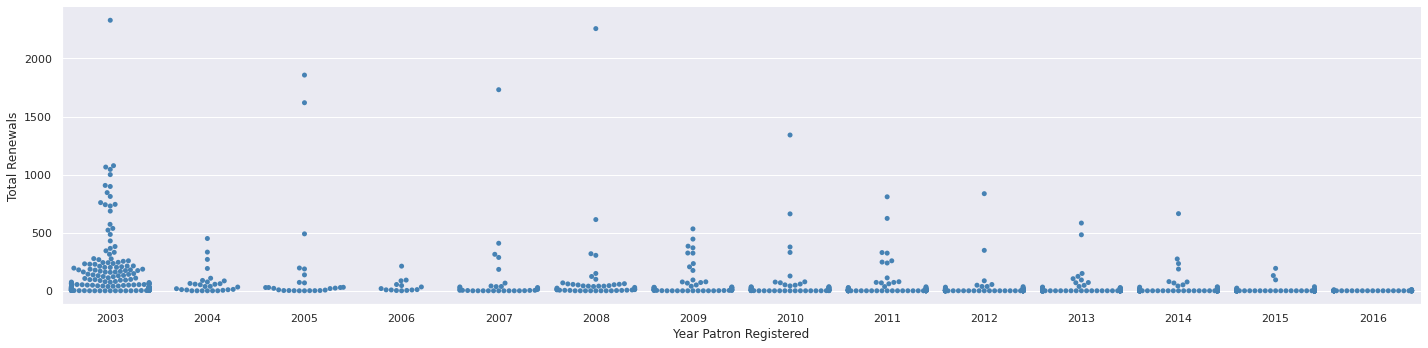

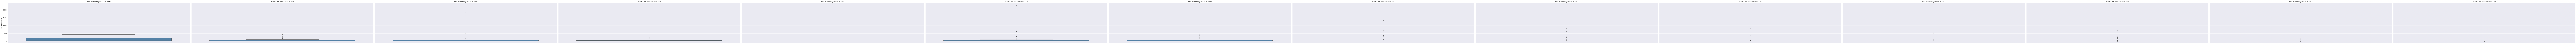

In [42]:
#Kombination aus metrischen und nominalen/ ordinalen Variablen:

# Swarmplot

sns.catplot(x='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='swarm', color="steelblue", aspect=4)
            
# Boxplot

sns.catplot(col='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='box', color="steelblue", aspect=4)